<a href="https://colab.research.google.com/github/inodie/inodie.github.io/blob/master/ch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.8 MB/s eta 0:00:00


In [ ]:
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

key = os.environ.get('AZURE_SEARCH_KEY', '347692c3e0f445e99453d7e1dcef8ccf') # not showing my key :)
search_images_bing

Mounted at /content/gdrive


<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [ ]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

150

In [ ]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

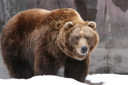

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#436) [Path('bears/grizzly/4213cf5d-16fb-4cd1-915f-144bd5b9d65b.jpg'),Path('bears/grizzly/8c8fd4e0-e9bd-4dfc-bea6-5320d53126e5.jpg'),Path('bears/grizzly/b4a1045d-0dc3-4580-a8a7-c9a606168bbf.jpg'),Path('bears/grizzly/ac3ae098-745f-44fe-bb11-3745ee60c2e1.jpg'),Path('bears/grizzly/f02914c4-2b20-4df0-bff9-5cb3973cd44e.jpg'),Path('bears/grizzly/69637f80-e1d9-4229-87df-ad853414d3fa.jpg'),Path('bears/grizzly/eb5be153-fdfa-4807-b35a-76d2bf33bf3a.jpg'),Path('bears/grizzly/572cda65-9d30-4113-9092-8636027c43a7.jpg'),Path('bears/grizzly/bfbd1efe-16cb-44b8-be92-f49ff02670fb.jpg'),Path('bears/grizzly/071717b5-8ea0-4be7-9175-4b7f1ddd5369.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#18) [Path('bears/grizzly/ac3ae098-745f-44fe-bb11-3745ee60c2e1.jpg'),Path('bears/grizzly/6aceb185-bb67-4f3b-a578-58b578478560.png'),Path('bears/grizzly/e04d54f4-41e0-4f88-a3bc-7cbab2ab5918.jpg'),Path('bears/grizzly/df1c64ba-1543-44c5-938c-7c023a8db3ba.jpg'),Path('bears/black/c6624546-5513-4d33-b498-fd115faaaec0.jpg'),Path('bears/black/7843dfe6-d2a2-4b47-830b-ec87542b7e0c.jpg'),Path('bears/black/7f712bc7-9f55-481a-bd00-1a9148005b69.jpg'),Path('bears/black/c9c11dd3-1504-478d-bb45-d65049d3a8e1.jpg'),Path('bears/black/9e529f94-db0f-417c-a7d9-1cdd14a05a4e.jpg'),Path('bears/black/44988d33-21b8-4b7e-a78a-4fde13600b4a.jpg')...]

In [ ]:
failed.map(Path.unlink);

In [ ]:
??verify_images

In [ ]:
bears = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(valid_pct=0.2, seed=42),
                  get_y=parent_label,
                  item_tfms=Resize(128))

In [ ]:
dls = bears.dataloaders(path)

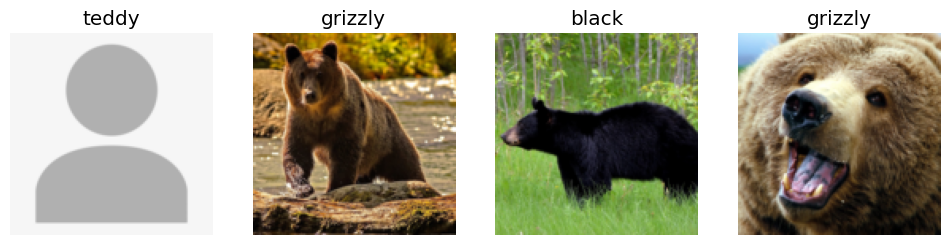

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

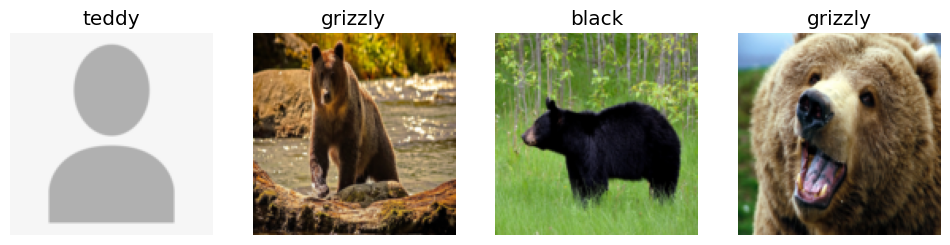

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

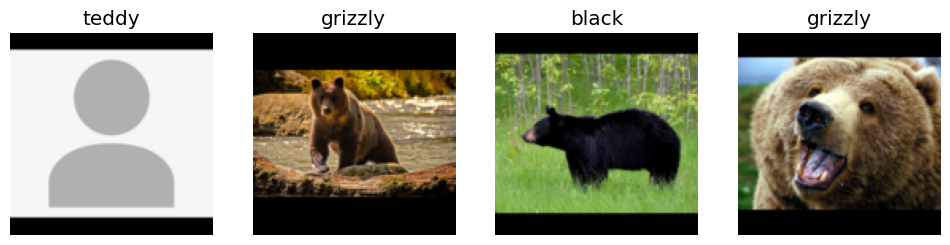

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

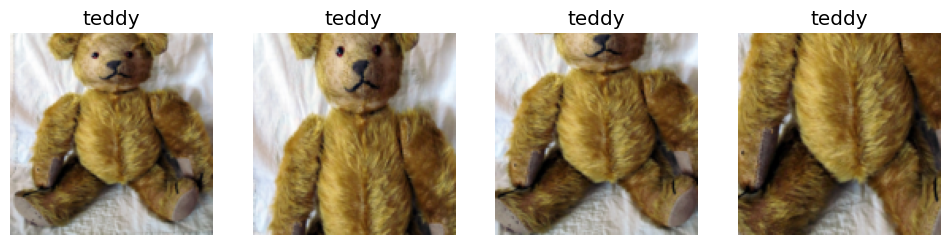

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

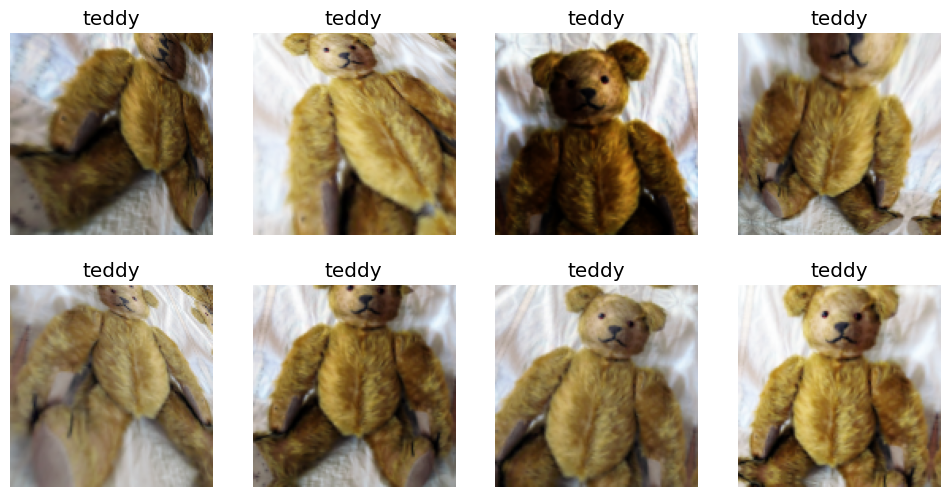

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

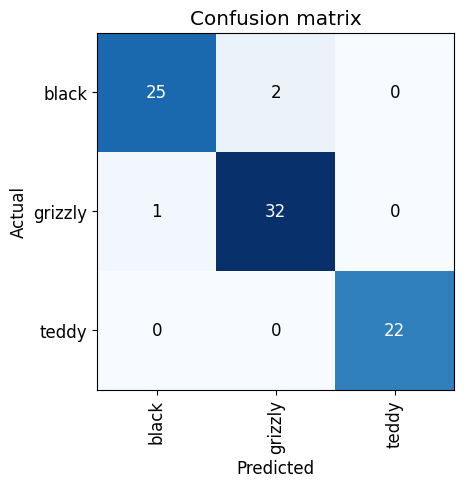

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

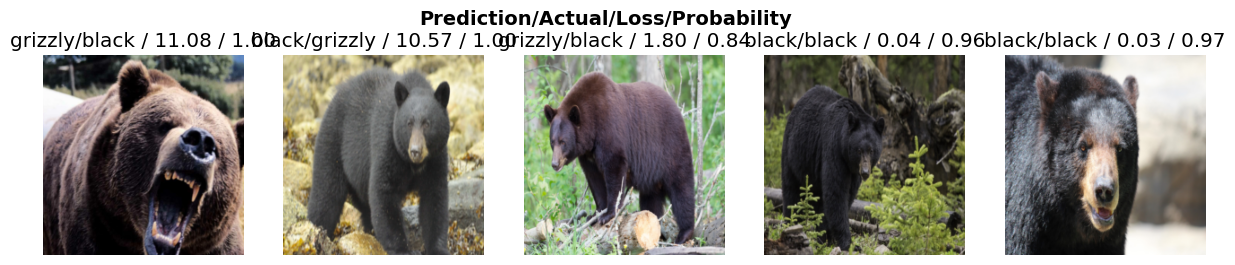

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([1.1482e-06, 1.0000e+00, 5.8959e-07]))

In [ ]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])


In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])